In [38]:
import subprocess
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
def test_case(array: list[int], path_to_testing_file: str) -> dict:
    """Runs given script with time util and returns dict with measured parameters"""
    
    args = ['/usr/bin/time', '-l', '-p', path_to_testing_file]
    child_proccess = subprocess.Popen(
        args, stdin=subprocess.PIPE, stdout=subprocess.PIPE, stderr=subprocess.PIPE)
    child_process_output = child_proccess.communicate(
        "\n".join(map(str, [len(array), *array])).encode()
    )
    
    time_data = [i.strip() for i in str(child_process_output[1]).split('\\n')]
    if time_data[0] == "b'time: command terminated abnormally":
        i = 1
    else:
        i = 0
    statistic_data = {
        'real_time': float(time_data[i+0].split()[1].replace(',', '.')),
        'user_time': float(time_data[i+1].split()[1].replace(',', '.')),
        'sys_time': float(time_data[i+2].split()[1].replace(',', '.')),
        'maximum_resident_set_size': int(time_data[i+3].split()[0]),
        'page_reclaims': int(time_data[i+7].split()[0]),
        'voluntary_context_switches': int(time_data[i+15].split()[0]),
        'involuntary_context_switches': int(time_data[i+16].split()[0]),
        'instructions_retired': int(time_data[i+17].split()[0]),
        'cycles_elapsed': int(time_data[i+18].split()[0]),
        'peak_memory_footprint': int(time_data[i+19].split()[0]),
    }
    
    return statistic_data

In [41]:
print(test_case(np.random.randint(-10000,10000,10000000), './counting_sort'))

{'real_time': 7.73, 'user_time': 2.21, 'sys_time': 0.03, 'maximum_resident_set_size': 40857600, 'page_reclaims': 10096, 'voluntary_context_switches': 2, 'involuntary_context_switches': 793, 'instructions_retired': 19810347137, 'cycles_elapsed': 8291083841, 'peak_memory_footprint': 40439808}


In [10]:
print(test_case(np.random.randint(-10000,10000,10000000), './quicksort'))

{'real_time': 22.48, 'user_time': 16.53, 'sys_time': 0.17, 'maximum_resident_set_size': 40796160, 'page_reclaims': 10081, 'voluntary_context_switches': 2, 'involuntary_context_switches': 16714, 'instructions_retired': 139428046957, 'cycles_elapsed': 61615626068, 'peak_memory_footprint': 40378368}


In [19]:
data = pd.DataFrame(columns=[
    'array_size', 
    'counting_sort_real_time',
    'counting_sort_user_time',
    'counting_sort_sys_time',
    'counting_sort_maximum_resident_set_size',
    'counting_sort_page_reclaims',
    'counting_sort_voluntary_context_switches',
    'counting_sort_involuntary_context_switches',
    'counting_sort_instructions_retired',
    'counting_sort_cycles_elapsed',
    'counting_sort_peak_memory_footprint',
    'quicksort_real_time',
    'quicksort_user_time',
    'quicksort_sys_time',
    'quicksort_maximum_resident_set_size',
    'quicksort_page_reclaims',
    'quicksort_voluntary_context_switches',
    'quicksort_involuntary_context_switches',
    'quicksort_instructions_retired',
    'quicksort_cycles_elapsed',
    'quicksort_peak_memory_footprint'
])

In [35]:
i = 0
for size in range(1000000, 10000000, 100000):
    counting_out = test_case(np.random.randint(-10000, 10000, size), './counting_sort')
    quicksort_out = test_case(np.random.randint(-10000,10000, size), './quicksort')
    data.loc[i] = [size, *list(counting_out.values()), *list(quicksort_out.values())]
    i += 1

KeyboardInterrupt: 

In [36]:
data

,array_size,counting_sort_real_time,counting_sort_user_time,counting_sort_sys_time,counting_sort_maximum_resident_set_size,counting_sort_page_reclaims,counting_sort_voluntary_context_switches,counting_sort_involuntary_context_switches,counting_sort_instructions_retired,counting_sort_cycles_elapsed,...,quicksort_real_time,quicksort_user_time,quicksort_sys_time,quicksort_maximum_resident_set_size,quicksort_page_reclaims,quicksort_voluntary_context_switches,quicksort_involuntary_context_switches,quicksort_instructions_retired,quicksort_cycles_elapsed,quicksort_peak_memory_footprint
0,1000000.0,0.81,0.23,0.00,4857856.0,1311.0,1.0,1029.0,1.989076e+09,8.798492e+08,...,1.18,0.59,0.01,4784128.0,1288.0,3.0,1987.0,4.745261e+09,2.260072e+09,4366336.0
1,1100000.0,0.84,0.24,0.00,5283840.0,1413.0,16.0,88.0,2.181487e+09,9.178581e+08,...,1.25,0.65,0.00,5185536.0,1386.0,1.0,301.0,5.271954e+09,2.426946e+09,4767744.0
2,1200000.0,0.91,0.26,0.00,5660672.0,1503.0,1.0,87.0,2.379888e+09,9.961975e+08,...,1.38,0.72,0.00,5582848.0,1483.0,1.0,517.0,5.870636e+09,2.707744e+09,5165056.0
3,1300000.0,0.99,0.28,0.00,6049792.0,1598.0,1.0,178.0,2.578130e+09,1.086801e+09,...,1.55,0.81,0.01,5984256.0,1581.0,2.0,1183.0,6.507813e+09,3.061676e+09,5566464.0
4,1400000.0,1.09,0.31,0.00,6434816.0,1692.0,1.0,141.0,2.776382e+09,1.165500e+09,...,1.64,0.87,0.01,6385664.0,1679.0,2.0,354.0,7.161597e+09,3.276551e+09,5967872.0
5,1500000.0,1.14,0.33,0.00,6926336.0,1812.0,1.0,238.0,2.974880e+09,1.251427e+09,...,1.78,0.95,0.01,6774784.0,1774.0,1.0,553.0,7.791030e+09,3.578811e+09,6356992.0
6,1600000.0,1.30,0.35,0.00,7229440.0,1886.0,5.0,570.0,3.151948e+09,1.350232e+09,...,1.92,1.04,0.01,7184384.0,1878.0,2.0,894.0,8.485271e+09,3.895407e+09,6766592.0
7,1700000.0,1.33,0.39,0.01,7659520.0,1991.0,1.0,1476.0,3.353431e+09,1.482666e+09,...,2.15,1.15,0.02,7585792.0,1972.0,1.0,4161.0,9.241778e+09,4.368072e+09,7168000.0
8,1800000.0,1.52,0.39,0.00,8044544.0,2087.0,1.0,426.0,3.544559e+09,1.499707e+09,...,2.21,1.21,0.01,7983104.0,2069.0,1.0,991.0,9.880160e+09,4.533935e+09,7565312.0
9,1900000.0,1.63,0.45,0.01,8474624.0,2192.0,1.0,2268.0,3.750869e+09,1.739262e+09,...,2.47,1.33,0.02,8384512.0,2167.0,1.0,2143.0,1.066130e+10,5.002924e+09,7966720.0


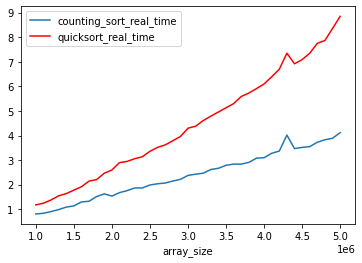

In [40]:
%matplotlib inline

ax = plt.gca()

data.plot(kind='line',x='array_size',y='counting_sort_real_time',ax=ax)
data.plot(kind='line',x='array_size',y='quicksort_real_time', color='red', ax=ax)

plt.show()